# Candidate independent loci from APOE $\epsilon$2 and APOE $\epsilon$4

Date: Sep 09, 2025

To examine whether there are potentially independent xQTLs in the APOE TAD region (chr19:41840000-47960000) that are independent of two well-known AD risk loci, APOE $\epsilon$2 and APOE $\epsilon$4, we performed a diagnostic approach using imputation of GWAS summary statistics.
- For each independent cis-xQTL set or trans-xQTL set, we used a leave-one-set-out imputation strategy. We first removed the summary statistics for variants in each set from all 6 AD GWAS summary statistics, then applied the RAISS imputation method to impute marginal association z-scores for each set and each AD GWAS.
- Analysis scope: In this analysis, we focused on the association region (chr19:42346101-46842901), which represents **Need to check with Alexandre why we use this region in APOE analysis. I was assuming that this is directly combined LD region from two LD block.** within the broader APOE TAD. All xQTLs within this association region were included in our independence assessment to ensure comprehensive coverage of potentially causal regulatory variants.


The analysis is organized into the following sections:

1. *Code for reproducing the imputation analysis*: This section provides the computational framework and implementation details for the leave-one-set-out imputation strategy, including data preprocessing steps, RAISS parameter settings, and quality control measures applied to ensure robust imputation results.
2. *Candidate independent AD risk loci in cis-xQTL*: This section examines 285 independent cis-xQTL sets within the association region, evaluating their potential independence from APOE $\epsilon$2 and APOE $\epsilon$4 through comparison of observed versus imputed z-scores across the 6 AD GWAS datasets.
3. *Candidate independent AD risk loci in trans-xQTL*: This section examines **XX** independent trans-xQTL sets within the association region, assessing whether distant regulatory effects captured by these trans-xQTLs represent novel, independent contributions to AD risk beyond the established APOE variants **Missing Now**.

## 1. Code for reproducing the imputation analysis

The code for performing the leave-one-CoS-out imputation strategy can be found in `APOE_Rcode.R`. The code is used for each GWAS and each CoS at one time. Code contains the following steps:
1. Load GWAS sumstat (`load_rss_data`) and LD matrix from APOE combined LD block region (`load_LD_matrix`).
2. Preprocess the input data (`rss_basic_qc`) with the transformation of Inf z-score as the max value - reproducing Alexandre previous code.
3. Perform Slalom quality control (`summary_stats_qc`) - reproducing Alexandre previous code.
4. Index the variants in the specific CoS then drop those variants from sumstats.
5. Perform RAISS imputation for the droped sumstats (`raiss`).

## 2. Candidate independent AD risk loci in cis-xQTL

- For 6 AD GWAS GWAS, we obtained 1830 - 1943 variants with valid imputation results, respectively (`RAISS_imputation_results_summary_cis_only.rds`). This summary results including variant names, the observed z-score, the imputed z-score, index of the independent CoS, the merged colocalization outcomes names, and the results file name you obtained after running section 1.
- Trying to reproduce the variants `rs5167` reported previously in Kellis fine-mapped CS3 and `rs2288911`in CS4. But based on the leave-one-CoS-out imputation strategy, we did not see much difference between the observed z-score and imputed z-score in all AD GWAS (**section 2.2**).
- Discovery the potential AD risk loci in cis-xQTL using a distance-based statistics and check LD of the variants with APOE2 and APOE4. This is a cheap idea for detection, and will be updated the better statistics for this.
  - Selection criteria: minimum p-values of variants in CoS < 0.05 and LD<0.2 with both APOE2 and APOE4 (given that the high LD will cause the higher imputation)
  - AD Bellenguez and AD Bellenguez EADB has a common s-QTL specific CoS (AC_lf2_sQTL_chr19:44916325:44926955:clu_129675_+:UP:ENSG00000130208; AC_lf2_sQTL_chr19:44916325:44930999:clu_129675_+:UP:ENSG00000130208) including one variant `19:44927023:C:G`.
  - Outside of sQTL-specific CoS, there is a CoS for gene **CEACAM19** including two variants `19:44646342:T:C` and `19:44662645:A:C` - (DLPFC_Bennett_pQTL_ENSG00000073008; DeJager_Exc_ENSG00000186567; DeJager_Inh_ENSG00000186567; Kellis_Exc_ENSG00000186567; Kellis_Inh_ENSG00000186567; Kellis_OPC_ENSG00000186567; ROSMAP_AC_ENSG00000186567; ROSMAP_DLPFC_ENSG00000186567; ROSMAP_PCC_ENSG00000186567).

In [4]:
library(tidyverse)
raiss_summary <- readRDS("/data1/deyk/xuewei/colocboost/pipeline/columbia/APOE/RAISS_imputation_results_summary_cis_only.rds")
sapply(raiss_summary, nrow) %>% as.data.frame

,.
,<int>
AD_Bellenguez,1875
AD_Bellenguez_EADB,1882
AD_Kunkle_Stage1_2019,1943
AD_Wightman_Full_2021,1834
AD_Wightman_Excluding23andMe_2021,1830
AD_Wightman_ExcludingUKBand23andME_2021,1829


In [5]:
raiss_summary[[1]] %>% head(n=1)

,variants,z_obs,z_imp,cos_idx,outcome,file
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2,19:42347760:C:G,0.8684211,0.3887788,cos_1,AC_lf2_sQTL_chr19:42358307:42358786:clu_129538_+:PR:ENSG00000105429; AC_lf2_sQTL_chr19:42358307:42359097:clu_129538_+:PR:ENSG00000105429; AC_lf2_sQTL_chr19:42358954:42359097:clu_129538_+:PR:ENSG00000105429; DLPFC_lf2_sQTL_chr19:42358307:42359097:clu_155115_+:PR:ENSG00000105429; DLPFC_lf2_sQTL_chr19:42358954:42359097:clu_155115_+:PR:ENSG00000105429; PCC_lf2_sQTL_chr19:42358307:42358786:clu_118897_+:PR:ENSG00000105429; PCC_lf2_sQTL_chr19:42358307:42359097:clu_118897_+:PR:ENSG00000105429; PCC_lf2_sQTL_chr19:42358954:42359097:clu_118897_+:PR:ENSG00000105429,rss_qc_imputed_AD_Bellenguez_indcos_1.rds


### 2.1 Visualization of the imputation results for all AD GWAS

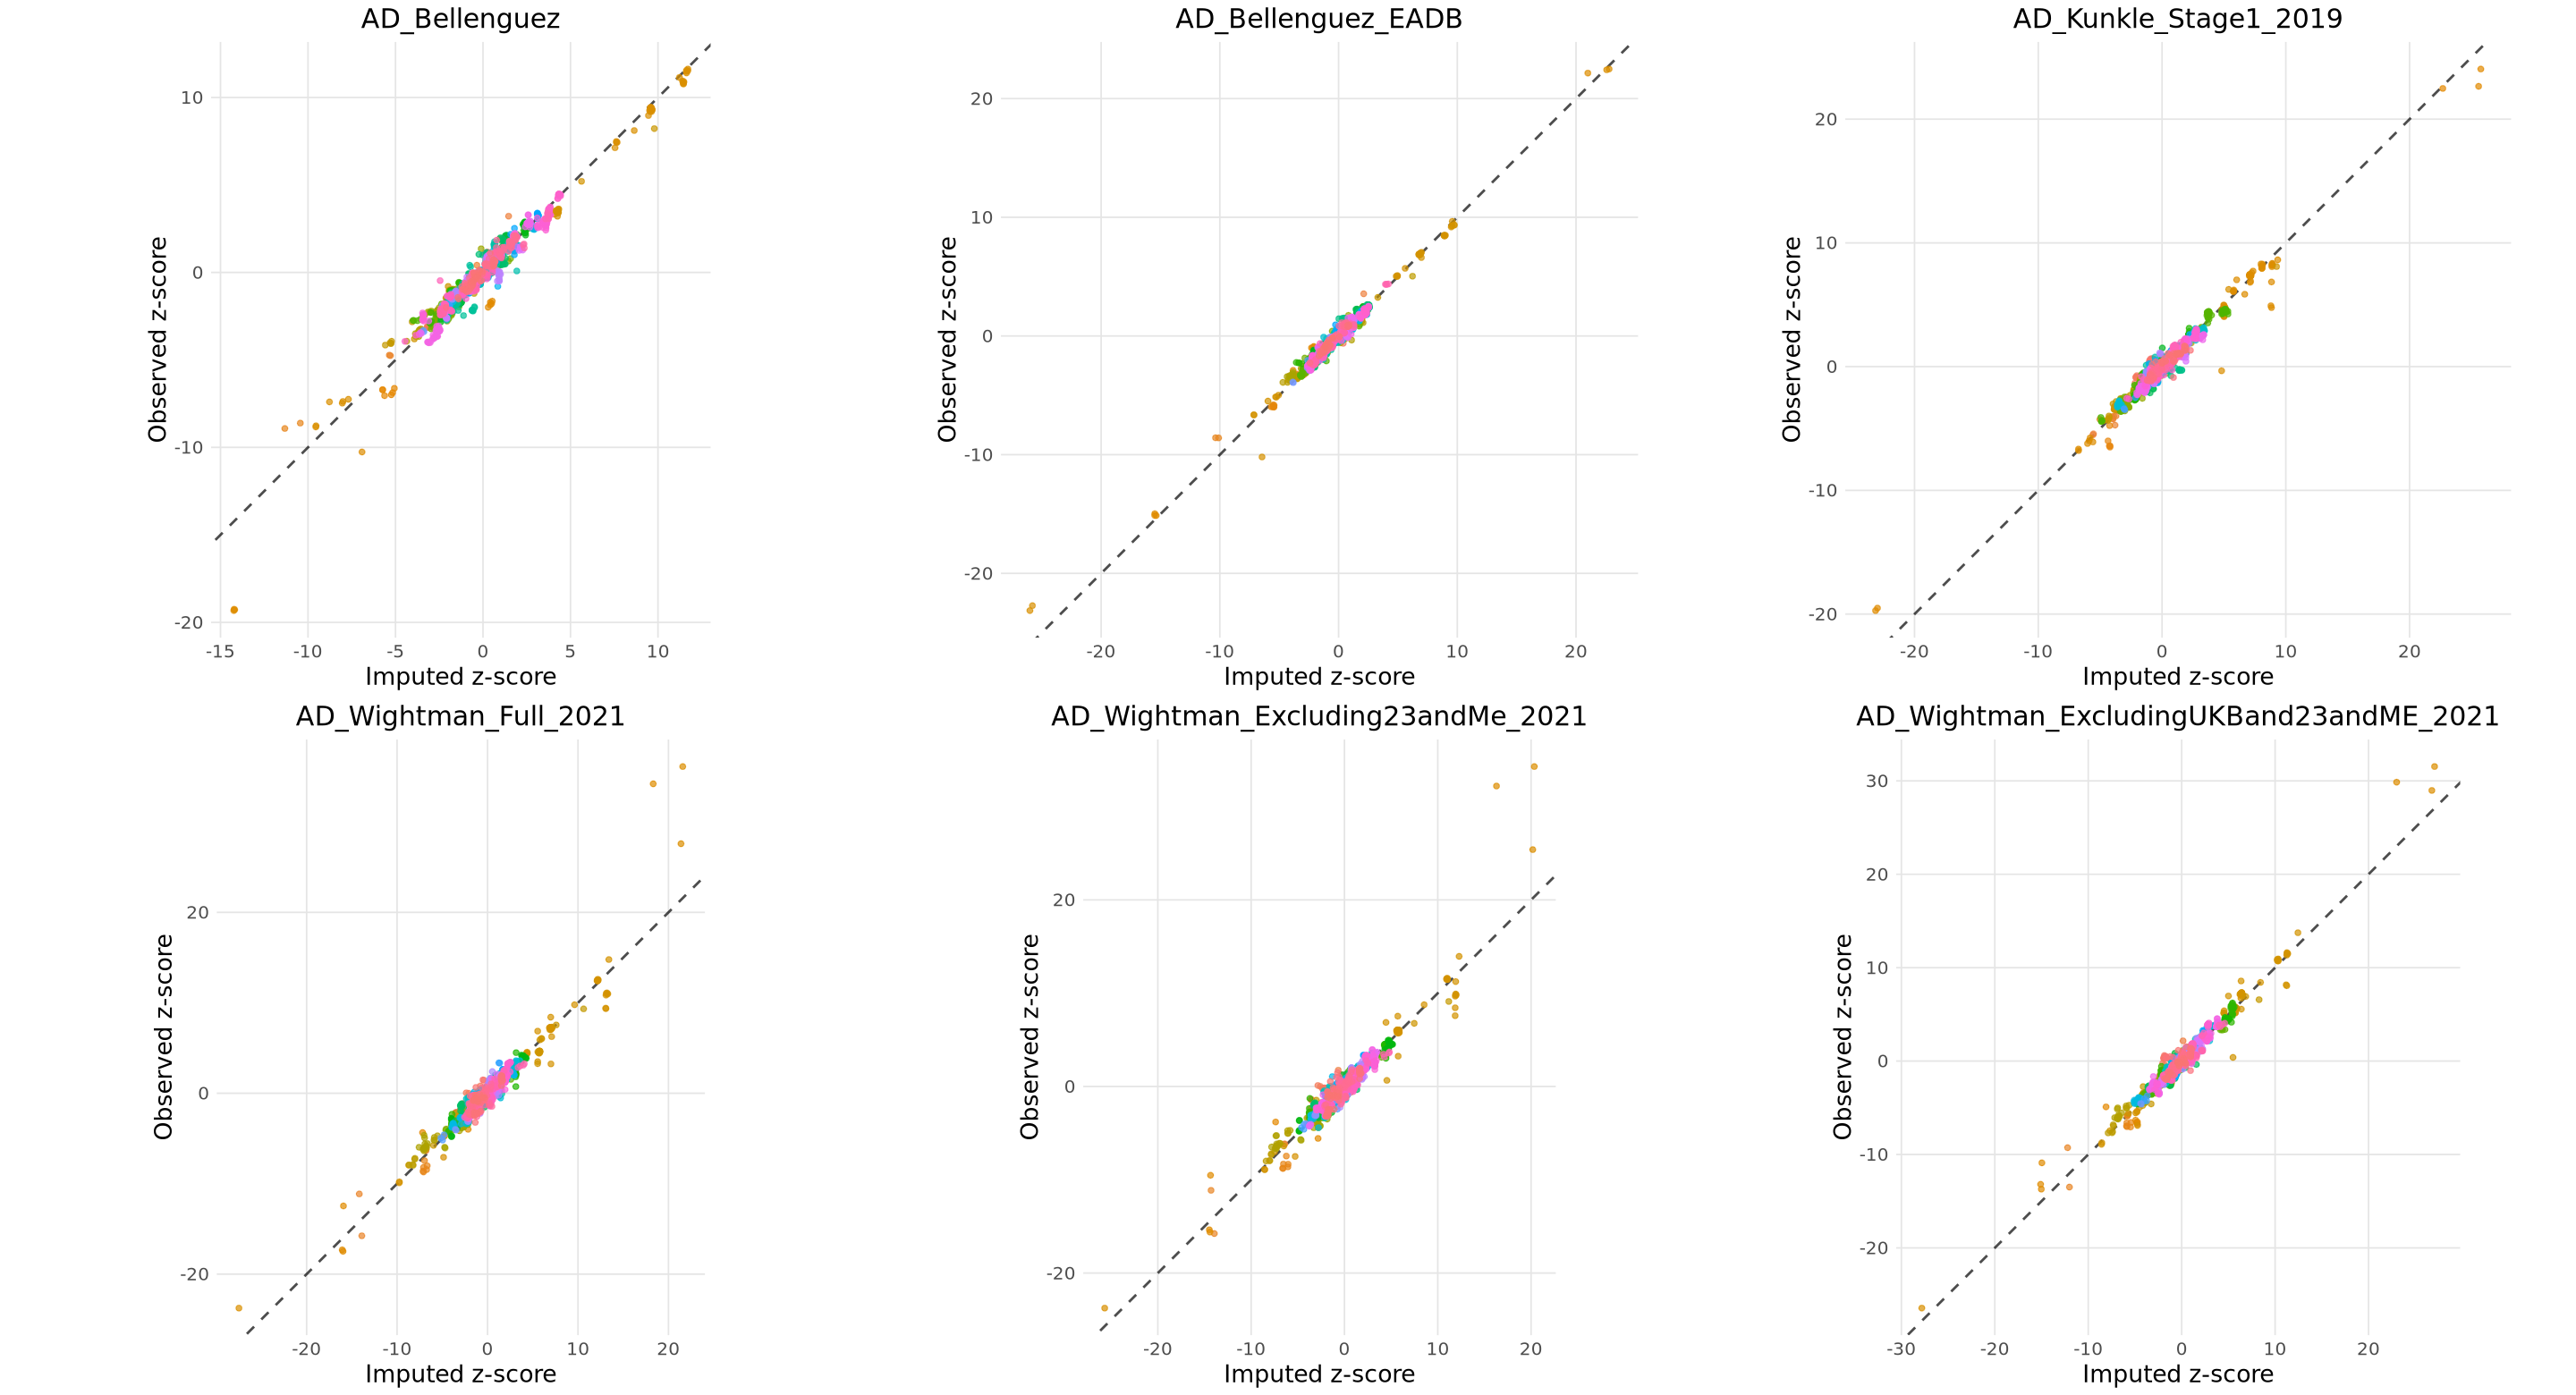

In [15]:
library(ggplot2)
library(gridExtra)
options(repr.plot.width = 24, repr.plot.height = 13)

# Create individual plots
plot_list <- list()

for(i in 1:6) {
  plot_list[[i]] <- ggplot(raiss_summary[[i]], aes(x = z_imp, y = z_obs)) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", 
                color = "black", alpha = 0.7, linewidth = 0.8) +
    geom_point(aes(color = cos_idx), alpha = 0.7, size = 1.5) +
    labs(
      y = "Observed z-score",
      x = "Imputed z-score",
      color = "COS",
      title = names(raiss_summary)[i]
    ) +
    theme_minimal() +
    theme(
      legend.position = "none",
      text = element_text(size = 14),
      axis.title = element_text(size = 16),
      axis.text = element_text(size = 12),
      plot.title = element_text(size = 18, hjust = 0.5),
      panel.grid.minor = element_blank(),
      panel.grid.major = element_line(color = "grey90")  # Fixed: removed alpha, used color instead
    ) +
    coord_equal()
}

# Arrange in 3 rows x 2 columns
grid.arrange(grobs = plot_list, nrow = 2, ncol = 3)

### 2.2 Check previous variant `rs5167` in Kellis fine-mapped CS3 and `rs2288911` in CS4?

In [18]:
lapply(raiss_summary, function(ss){
    ss %>% filter(grepl("19:44945208", variants))
})

variants,z_obs,z_imp,cos_idx,outcome,file
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19:44945208:T:G,11.14607,11.22493,cos_137,DeJager_Mic_ENSG00000130203; Kellis_Mic_ENSG00000130203; DeJager_Mic_ENSG00000130208; Kellis_Mic_ENSG00000130208,rss_qc_imputed_AD_Bellenguez_indcos_137.rds
variants,z_obs,z_imp,cos_idx,outcome,file
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19:44945208:T:G,9.65202,9.576777,cos_137,DeJager_Mic_ENSG00000130203; Kellis_Mic_ENSG00000130203; DeJager_Mic_ENSG00000130208; Kellis_Mic_ENSG00000130208,rss_qc_imputed_AD_Bellenguez_EADB_indcos_137.rds
variants,z_obs,z_imp,cos_idx,outcome,file
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19:44945208:T:G,8.630872,9.347072,cos_137,DeJager_Mic_ENSG00000130203; Kellis_Mic_ENSG00000130203; DeJager_Mic_ENSG00000130208; Kellis_Mic_ENSG00000130208,rss_qc_imputed_AD_Kunkle_Stage1_2019_indcos_137.rds
variants,z_obs,z_imp,cos_idx,outcome,file
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>


In [19]:
lapply(raiss_summary, function(ss){
    ss %>% filter(grepl("19:44946027", variants))
})

variants,z_obs,z_imp,cos_idx,outcome,file
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19:44946027:T:G,7.125,7.54528,cos_137,DeJager_Mic_ENSG00000130203; Kellis_Mic_ENSG00000130203; DeJager_Mic_ENSG00000130208; Kellis_Mic_ENSG00000130208,rss_qc_imputed_AD_Bellenguez_indcos_137.rds
variants,z_obs,z_imp,cos_idx,outcome,file
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19:44946027:T:G,5.031638,4.850486,cos_137,DeJager_Mic_ENSG00000130203; Kellis_Mic_ENSG00000130203; DeJager_Mic_ENSG00000130208; Kellis_Mic_ENSG00000130208,rss_qc_imputed_AD_Bellenguez_EADB_indcos_137.rds
variants,z_obs,z_imp,cos_idx,outcome,file
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19:44946027:T:G,6.191781,5.797036,cos_137,DeJager_Mic_ENSG00000130203; Kellis_Mic_ENSG00000130203; DeJager_Mic_ENSG00000130208; Kellis_Mic_ENSG00000130208,rss_qc_imputed_AD_Kunkle_Stage1_2019_indcos_137.rds
variants,z_obs,z_imp,cos_idx,outcome,file
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>


### 2.3 Distance based statistical test for the imputation results (cheap idea)

In [34]:
cix_xqtl_summary <- readRDS("/data1/deyk/xuewei/colocboost/pipeline/columbia/APOE/xqtl_only_APOE_all_cohorts_addGWAS.rds")
cix_xqtl_summary %>% head

#chr,start,end,a1,a2,variant_ID,region_ID,event_ID,cos_ID,vcp,⋯,cohort,identifier,APOE2_cor,APOE4_cor,AD_Bellenguez,AD_Kunkle_Stage1_2019,AD_Wightman_Full_2021,AD_Wightman_Excluding23andMe_2021,AD_Wightman_ExcludingUKBand23andME_2021,AD_Bellenguez_EADB_2022
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr19,41896933,41896933,ACCTCCCCCCTCCTCTCTCACCTTCCCCCTCCTCTCTTT,A,chr19:41896933:A:ACCTCCCCCCTCCTCTCTCACCTTCCCCCTCCTCTCTTT,ENSG00000075702,PCC_lf2_sQTL_chr19:36083188:36084652:clu_118392_+:NE:ENSG00000075702; PCC_lf2_sQTL_chr19:36083241:36084652:clu_118392_+:PR:ENSG00000075702,ENSG00000075702:cos1:y22_y23,0.999927014,⋯,ROSMAP,ENSG00000075702:cos1:y22_y23; PCC_lf2_sQTL_chr19:36083188:36084652:clu_118392_+:NE:ENSG00000075702; PCC_lf2_sQTL_chr19:36083241:36084652:clu_118392_+:PR:ENSG00000075702,0.008514667,-0.03795463,NA,NA,NA,NA,NA,NA
chr19,41924615,41924615,G,A,chr19:41924615:A:G,ENSG00000105404,ROSMAP_AC_ENSG00000105404; ROSMAP_DLPFC_ENSG00000105404; ROSMAP_PCC_ENSG00000105404,ENSG00000105404:cos1:y13_y14_y16,0.009947145,⋯,ROSMAP,ENSG00000105404:cos1:y13_y14_y16; ROSMAP_AC_ENSG00000105404; ROSMAP_DLPFC_ENSG00000105404; ROSMAP_PCC_ENSG00000105404,-0.006763106,-0.02721777,0.6219657,NA,0.1812836,0.1812836,NA,0.4299044
chr19,41925681,41925681,A,G,chr19:41925681:G:A,ENSG00000105404,ROSMAP_AC_ENSG00000105404; ROSMAP_DLPFC_ENSG00000105404; ROSMAP_PCC_ENSG00000105404,ENSG00000105404:cos1:y13_y14_y16,0.018625740,⋯,ROSMAP,ENSG00000105404:cos1:y13_y14_y16; ROSMAP_AC_ENSG00000105404; ROSMAP_DLPFC_ENSG00000105404; ROSMAP_PCC_ENSG00000105404,-0.002882181,-0.02908831,NA,0.03701542,0.3150206,0.3150206,0.19640634,0.3656810
chr19,41930164,41930164,G,C,chr19:41930164:C:G,ENSG00000105404,ROSMAP_AC_ENSG00000105404; ROSMAP_DLPFC_ENSG00000105404; ROSMAP_PCC_ENSG00000105404,ENSG00000105404:cos1:y13_y14_y16,0.014985178,⋯,ROSMAP,ENSG00000105404:cos1:y13_y14_y16; ROSMAP_AC_ENSG00000105404; ROSMAP_DLPFC_ENSG00000105404; ROSMAP_PCC_ENSG00000105404,-0.002892787,-0.02391997,0.5922693,NA,0.2043100,0.2043100,NA,0.3761204
chr19,41930288,41930288,C,G,chr19:41930288:G:C,ENSG00000105404,ROSMAP_AC_ENSG00000105404; ROSMAP_DLPFC_ENSG00000105404; ROSMAP_PCC_ENSG00000105404,ENSG00000105404:cos1:y13_y14_y16,0.023988430,⋯,ROSMAP,ENSG00000105404:cos1:y13_y14_y16; ROSMAP_AC_ENSG00000105404; ROSMAP_DLPFC_ENSG00000105404; ROSMAP_PCC_ENSG00000105404,-0.004932222,-0.02417259,0.6294869,0.12124848,0.1799801,0.1799801,0.03221809,0.3844666
chr19,41931584,41931584,T,G,chr19:41931584:G:T,ENSG00000105404,ROSMAP_AC_ENSG00000105404; ROSMAP_DLPFC_ENSG00000105404; ROSMAP_PCC_ENSG00000105404,ENSG00000105404:cos1:y13_y14_y16,0.014601421,⋯,ROSMAP,ENSG00000105404:cos1:y13_y14_y16; ROSMAP_AC_ENSG00000105404; ROSMAP_DLPFC_ENSG00000105404; ROSMAP_PCC_ENSG00000105404,-0.002384244,-0.02584696,NA,0.01448371,0.1970726,0.1970726,0.13088567,0.3663094


In [130]:
distance_analysis <- function(summary){
    summary %>%
      mutate(
        # Distance from y=x line
        distance_from_diagonal = abs(z_obs - z_imp),
        # Perpendicular distance from y=x line
        perp_distance = abs(z_obs - z_imp) / sqrt(2),
        # check the correlation with APOE2
        cor_APOE2 = abs(cix_xqtl_summary$APOE2_cor[match(paste0("chr", variants), cix_xqtl_summary$variant_ID)]),
        # check the correlation with APOE4
        cor_APOE4 = abs(cix_xqtl_summary$APOE4_cor[match(paste0("chr", variants), cix_xqtl_summary$variant_ID)]),
        p_value = pchisq(perp_distance^2, 1, lower.tail = FALSE)
      ) %>%
      group_by(cos_idx) %>%
      summarise(
        n_variants = n(),
        mean_observed_z = mean(abs(z_obs), na.rm = TRUE),
        mean_imputed_z = mean(abs(z_imp), na.rm = TRUE),
        max_abscor_APOE2 = max(cor_APOE2, na.rm = TRUE),
        max_abscor_APOE4 = max(cor_APOE4, na.rm = TRUE),
        # mean_distance = mean(distance_from_diagonal, na.rm = TRUE),
        # median_distance = median(distance_from_diagonal, na.rm = TRUE),
        max_distance = max(distance_from_diagonal, na.rm = TRUE),
        #mean_perp_distance = mean(perp_distance, na.rm = TRUE),
        # median_perp_distance = median(perp_distance, na.rm = TRUE),
        max_perp_distance = max(perp_distance, na.rm = TRUE),
        variants_ID = paste0(variants, collapse = "; "),
        outcome = outcome[1],
        file = file[1],
        min_pvalue = min(p_value),
        bh_adjusted = min(p.adjust(p_value, method = "BH"))
      ) %>%
      arrange(bh_adjusted)
}
distance_summary <- lapply(raiss_summary, distance_analysis)

In [131]:
distance_summary[[1]] %>% head(n=5)

cos_idx,n_variants,mean_observed_z,mean_imputed_z,max_abscor_APOE2,max_abscor_APOE4,max_distance,max_perp_distance,variants_ID,outcome,file,min_pvalue,bh_adjusted
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
cos_128,3,19.28806217,14.2178830,0.64514587,0.06155799,5.092335,3.600825,19:44893972:G:A; 19:44897490:T:A; 19:44899005:T:G,AC_lf2_sQTL_chr19:44882364:44888109:clu_129669_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44878222:clu_119013_+:PR:ENSG00000130202; PCC_lf2_sQTL_chr19:44874478:44882210:clu_119013_+:PR:ENSG00000130202,rss_qc_imputed_AD_Bellenguez_indcos_128.rds,0.0003172094,0.0003750548
cos_135,1,10.26315789,6.9130070,0.06717244,0.06355071,3.350151,2.368914,19:44927023:C:G,AC_lf2_sQTL_chr19:44916325:44926955:clu_129675_+:UP:ENSG00000130208; AC_lf2_sQTL_chr19:44916325:44930999:clu_129675_+:UP:ENSG00000130208,rss_qc_imputed_AD_Bellenguez_indcos_135.rds,0.0178403822,0.0178403822
cos_122,5,1.79550265,0.4305079,0.06703899,0.01357677,2.286278,1.616642,19:44852338:C:T; 19:44853638:G:A; 19:44855243:G:A; 19:44855891:C:G; 19:44856313:A:G,AC_lf2_sQTL_chr19:47203740:47209158:clu_129835_+:PR:ENSG00000142230; AC_lf2_sQTL_chr19:47205129:47209158:clu_129835_+:PR:ENSG00000142230,rss_qc_imputed_AD_Bellenguez_indcos_122.rds,0.1059554821,0.1327983992
cos_113,2,8.76642336,10.8817485,0.04107180,0.08382691,2.403404,1.699464,19:44646342:T:C; 19:44662645:A:C,DLPFC_Bennett_pQTL_ENSG00000073008; DeJager_Exc_ENSG00000186567; DeJager_Inh_ENSG00000186567; Kellis_Exc_ENSG00000186567; Kellis_Inh_ENSG00000186567; Kellis_OPC_ENSG00000186567; ROSMAP_AC_ENSG00000186567; ROSMAP_DLPFC_ENSG00000186567; ROSMAP_PCC_ENSG00000186567,rss_qc_imputed_AD_Bellenguez_indcos_113.rds,0.0892318749,0.1784637499
cos_227,1,0.08159393,1.9302039,0.02352748,0.01362588,1.848610,1.307165,19:46406890:A:G,DeJager_Exc_ENSG00000125746; DeJager_Inh_ENSG00000125746,rss_qc_imputed_AD_Bellenguez_indcos_227.rds,0.1911568043,0.1911568043


In [132]:
extract_potential <- lapply(distance_summary, function(summary){
    summary %>% filter(max_abscor_APOE2<0.2 & max_abscor_APOE4 < 0.2) %>% filter(bh_adjusted < 0.1)
})

In [133]:
extract_potential[[1]]

cos_idx,n_variants,mean_observed_z,mean_imputed_z,max_abscor_APOE2,max_abscor_APOE4,max_distance,max_perp_distance,variants_ID,outcome,file,min_pvalue,bh_adjusted
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
cos_135,1,10.26316,6.913007,0.06717244,0.06355071,3.350151,2.368914,19:44927023:C:G,AC_lf2_sQTL_chr19:44916325:44926955:clu_129675_+:UP:ENSG00000130208; AC_lf2_sQTL_chr19:44916325:44930999:clu_129675_+:UP:ENSG00000130208,rss_qc_imputed_AD_Bellenguez_indcos_135.rds,0.01784038,0.01784038


In [134]:
extract_potential[[2]]

cos_idx,n_variants,mean_observed_z,mean_imputed_z,max_abscor_APOE2,max_abscor_APOE4,max_distance,max_perp_distance,variants_ID,outcome,file,min_pvalue,bh_adjusted
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
cos_135,1,10.19505,6.447521,0.06717244,0.06355071,3.747529,2.649903,19:44927023:C:G,AC_lf2_sQTL_chr19:44916325:44926955:clu_129675_+:UP:ENSG00000130208; AC_lf2_sQTL_chr19:44916325:44930999:clu_129675_+:UP:ENSG00000130208,rss_qc_imputed_AD_Bellenguez_EADB_indcos_135.rds,0.008051489,0.008051489


In [135]:
extract_potential[[3]]

cos_idx,n_variants,mean_observed_z,mean_imputed_z,max_abscor_APOE2,max_abscor_APOE4,max_distance,max_perp_distance,variants_ID,outcome,file,min_pvalue,bh_adjusted
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
cos_141,22,4.423876,5.008799,0.045026,0.03728499,5.150728,3.642115,19:45081719:C:T; 19:45081916:C:T; 19:45083747:C:T; 19:45083977:A:G; 19:45084147:G:A; 19:45084547:T:C; 19:45084881:A:G; 19:45084908:A:C; 19:45084960:G:A; 19:45085140:A:G; 19:45085204:G:A; 19:45085511:T:C; 19:45085715:A:G; 19:45086157:A:G; 19:45086337:C:T; 19:45086979:T:C; 19:45087478:G:GT; 19:45087730:G:A; 19:45088086:C:T; 19:45088095:G:A; 19:45088420:G:A; 19:45088482:A:T,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Kunkle_Stage1_2019_indcos_141.rds,0.0002704076,0.005948967


In [136]:
extract_potential[[4]]

cos_idx,n_variants,mean_observed_z,mean_imputed_z,max_abscor_APOE2,max_abscor_APOE4,max_distance,max_perp_distance,variants_ID,outcome,file,min_pvalue,bh_adjusted
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
cos_119,1,4.345579,7.182163,0.002274422,0.03689960,2.836583,2.005767,19:44791300:T:C,PCC_lf2_sQTL_chr19:43646548:43652224:clu_123024_-:PR:ENSG00000011422; PCC_lf2_sQTL_chr19:43649143:43652224:clu_123024_-:PR:ENSG00000011422,rss_qc_imputed_AD_Wightman_Full_2021_indcos_119.rds,0.04488107,0.04488107
cos_113,2,13.449236,14.037015,0.041071802,0.08382691,3.042823,2.151601,19:44646342:T:C; 19:44662645:A:C,DLPFC_Bennett_pQTL_ENSG00000073008; DeJager_Exc_ENSG00000186567; DeJager_Inh_ENSG00000186567; Kellis_Exc_ENSG00000186567; Kellis_Inh_ENSG00000186567; Kellis_OPC_ENSG00000186567; ROSMAP_AC_ENSG00000186567; ROSMAP_DLPFC_ENSG00000186567; ROSMAP_PCC_ENSG00000186567,rss_qc_imputed_AD_Wightman_Full_2021_indcos_113.rds,0.03142879,0.06285757


In [137]:
extract_potential[[5]]

cos_idx,n_variants,mean_observed_z,mean_imputed_z,max_abscor_APOE2,max_abscor_APOE4,max_distance,max_perp_distance,variants_ID,outcome,file,min_pvalue,bh_adjusted
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
cos_119,1,3.804752,7.373987,0.002274422,0.03689960,3.569235,2.523830,19:44791300:T:C,PCC_lf2_sQTL_chr19:43646548:43652224:clu_123024_-:PR:ENSG00000011422; PCC_lf2_sQTL_chr19:43649143:43652224:clu_123024_-:PR:ENSG00000011422,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_119.rds,0.01160839,0.01160839
cos_113,2,13.449236,14.119890,0.041071802,0.08382691,3.162956,2.236548,19:44646342:T:C; 19:44662645:A:C,DLPFC_Bennett_pQTL_ENSG00000073008; DeJager_Exc_ENSG00000186567; DeJager_Inh_ENSG00000186567; Kellis_Exc_ENSG00000186567; Kellis_Inh_ENSG00000186567; Kellis_OPC_ENSG00000186567; ROSMAP_AC_ENSG00000186567; ROSMAP_DLPFC_ENSG00000186567; ROSMAP_PCC_ENSG00000186567,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_113.rds,0.02531592,0.05063184


In [138]:
extract_potential[[6]]

cos_idx,n_variants,mean_observed_z,mean_imputed_z,max_abscor_APOE2,max_abscor_APOE4,max_distance,max_perp_distance,variants_ID,outcome,file,min_pvalue,bh_adjusted
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
cos_141,21,5.313913,5.739858,0.045025996,0.03728499,5.101333,3.607187,19:45081719:C:T; 19:45081916:C:T; 19:45083747:C:T; 19:45083977:A:G; 19:45084147:G:A; 19:45084547:T:C; 19:45084881:A:G; 19:45084908:A:C; 19:45084960:G:A; 19:45085140:A:G; 19:45085204:G:A; 19:45085511:T:C; 19:45085715:A:G; 19:45086157:A:G; 19:45086337:C:T; 19:45086979:T:C; 19:45087730:G:A; 19:45088086:C:T; 19:45088095:G:A; 19:45088420:G:A; 19:45088482:A:T,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Wightman_ExcludingUKBand23andME_2021_indcos_141.rds,0.0003095346,0.006500226
cos_119,1,4.904977,8.096490,0.002274422,0.03689960,3.191512,2.256740,19:44791300:T:C,PCC_lf2_sQTL_chr19:43646548:43652224:clu_123024_-:PR:ENSG00000011422; PCC_lf2_sQTL_chr19:43649143:43652224:clu_123024_-:PR:ENSG00000011422,rss_qc_imputed_AD_Wightman_ExcludingUKBand23andME_2021_indcos_119.rds,0.0240243297,0.024024330
cos_113,2,11.380816,12.111105,0.041071802,0.08382691,2.938875,2.078099,19:44646342:T:C; 19:44662645:A:C,DLPFC_Bennett_pQTL_ENSG00000073008; DeJager_Exc_ENSG00000186567; DeJager_Inh_ENSG00000186567; Kellis_Exc_ENSG00000186567; Kellis_Inh_ENSG00000186567; Kellis_OPC_ENSG00000186567; ROSMAP_AC_ENSG00000186567; ROSMAP_DLPFC_ENSG00000186567; ROSMAP_PCC_ENSG00000186567,rss_qc_imputed_AD_Wightman_ExcludingUKBand23andME_2021_indcos_113.rds,0.0377002609,0.075400522


In [139]:
raiss_summary[[5]] %>% filter(cos_idx == "cos_141")

variants,z_obs,z_imp,cos_idx,outcome,file
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19:45081719:C:T,4.4767687,4.980480,cos_141,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_141.rds
19:45081916:C:T,4.5247202,4.919557,cos_141,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_141.rds
19:45083747:C:T,4.5555395,4.665575,cos_141,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_141.rds
19:45083977:A:G,0.6535828,4.548600,cos_141,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_141.rds
19:45084147:G:A,4.5185275,4.651395,cos_141,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_141.rds
19:45084547:T:C,4.4924227,4.721186,cos_141,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_141.rds
19:45084881:A:G,4.6397150,4.724359,cos_141,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_141.rds
19:45084908:A:C,4.6374643,4.742353,cos_141,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_141.rds
19:45084960:G:A,4.6497124,4.736706,cos_141,ROSMAP_DLPFC_ENSG00000170684; ROSMAP_PCC_ENSG00000170684,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_141.rds
